<a href="https://colab.research.google.com/github/jdxxmahmud/Deep-Learning-Practice/blob/main/Linear-Classification-Examples/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data

In [21]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [22]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# Load the data
data = load_breast_cancer()

In [23]:
# Check the type of the data
type(data)

sklearn.utils.Bunch

## Looking at the data

In [5]:
# note: it is a bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' (the attribute) means the input data
data.data.shape
# (rows, columns) rows are observations or samples, columns are features.

(569, 30)

In [8]:
# this is basically the 'y' we are focussing on.
data.target.shape

(569,)

In [14]:
# has 1 and 0 based on values
# equal number of targets corresponding to data or 'samples'

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# what the target values mean in real life
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# the features that we are going to use
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Splitting for test and traing

In [15]:
# we can put our imports at the top following the convention. But portrays the importance of the import.
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future

# we are making 33% of the total data into test set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
# N, D may or may not be useful later

In [20]:
# Scale the data
# The output is a linear combination of input. If the range of input is huge, like one input is .1 and another is 1000000, the weights will be sensitive.
# If range is small, weights won't be sensitive enough.
# Standardization basically means SUBTRACTING BY MEAN THEN DIVIDING BY STANDARD DAVIATION 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)
X_test = scaler.fit_transform(X=X_test)
## we are scaling test and train data differently because
  ## we don't want anything of both the sets get mixed.

#### **Build the model using tensorflow


In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D, )),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D, ), activation='sigmoid))


model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Evaluate the model = evaluate() return loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.4987 - accuracy: 0.7612 - val_loss: 0.4829 - val_accuracy: 0.7500
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7874 - val_loss: 0.4476 - val_accuracy: 0.7766
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8136 - val_loss: 0.4170 - val_accuracy: 0.7979
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8294 - val_loss: 0.3913 - val_accuracy: 0.8138
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8451 - val_loss: 0.3689 - val_accuracy: 0.8351
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8688 - val_loss: 0.3496 - val_accuracy: 0.8404
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8793 - val_loss: 0.3325 - val_accuracy: 0.8404
Epoch 8/100


## Check how good the model is doing

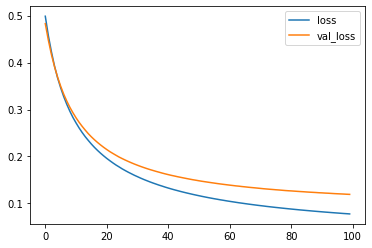

In [31]:
# Plot what's returned by model.fit()
# It returns an objects that contains the data from training process
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()     # You will NOT see the labels if you don't use this line!

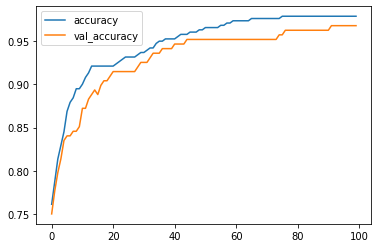

In [33]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

## Part 2: Making Predictions

In [39]:
predictions = model.predict(X_test)
for pred in predictions:
  if pred < 0.5:
    print('0')
  else:
    print('1')
# We get the values by putting the activation in sigmoid functions. Output if basically probabilities, either 0 or 1 after rounding up the value


0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
0
1
1
0
0
0
1
1
1
1
1
0
1
0
1
1
1
